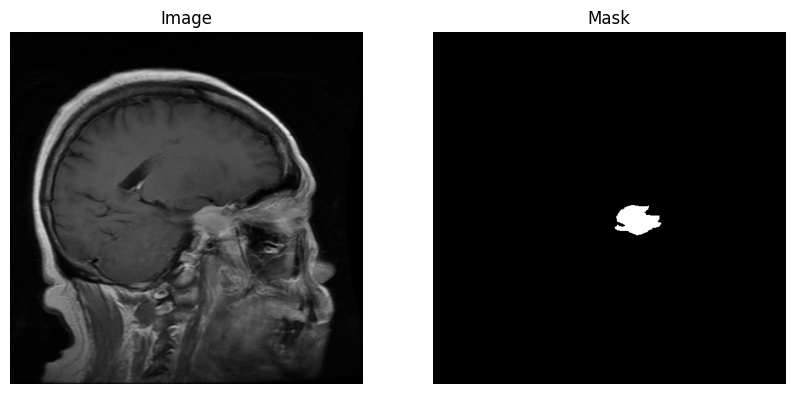

In [14]:
from albumentations import ToTensorV2
from main import VAL_IMG_DIR, VAL_MASK_DIR, IMAGE_HEIGHT, IMAGE_WIDTH
from src.dataset import FormatDataset
import albumentations as A
from matplotlib import pyplot as plt


validate_transform = A.Compose([
        A.Resize(IMAGE_HEIGHT, IMAGE_WIDTH),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ])

data = FormatDataset(
        image_dir=VAL_IMG_DIR,
        mask_dir=VAL_MASK_DIR,
        transform=validate_transform,
    )

# Get the first sample
image, mask = data[0]

# Convert image tensor (C,H,W) to NumPy (H,W,C)
image_np = image.permute(1, 2, 0).numpy()

# Mask is single channel, just convert to NumPy
mask_np = mask.numpy()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image_np)
axes[0].set_title("Image")
axes[0].axis('off')

axes[1].imshow(mask_np, cmap='gray')
axes[1].set_title("Mask")
axes[1].axis('off')

plt.show()